<h2 id="exercises">Decision Tree Exercises</h2>

Using the titanic data, in your classification-exercises repository, create a notebook, `model.ipynb` where you will do the following:


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import wrangle
import eval

import graphviz
from graphviz import Graph

In [ ]:
titanic_train, titanic_validate, titanic_test = wrangle.wrangle_titanic()

In [ ]:
print(f'Tain: {titanic_train.shape}')
print(f'Validate: {titanic_validate.shape}')
print(f'Test: {titanic_test.shape}')

In [ ]:
titanic_train.head()

In [ ]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = titanic_train.drop(columns=['survived', 'sex', 'embark_town'])
y_train = titanic_train.survived

X_validate = titanic_validate.drop(columns=['survived', 'sex', 'embark_town'])
y_validate = titanic_validate.survived

X_test = titanic_test.drop(columns=['survived', 'sex', 'embark_town'])
y_test = titanic_test.survived

In [ ]:
X_train.shape

1. <p>What is your baseline prediction? What is your baseline accuracy? <em>remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.</em></p>

In [ ]:
# Most people died, so a baseline prediation of everyone dying is a valid starting point

baseline = y_train.mode()

match_baseline = y_train == 0

baseline_accuracy = match_baseline.mean()

print(f'Baseline accuracy : {baseline_accuracy}')

2. <p>Fit the decision tree classifier to your training sample and transform (i.e.  make predictions on the training sample)</p>



In [ ]:
# Adam review

tree1 = DecisionTreeClassifier(max_depth=1, random_state=123)

tree1 = tree1.fit(X_train, y_train)

y_predictions = tree1.predict(X_train)

In [ ]:
pd.DataFrame(confusion_matrix(y_train, y_predictions))

In [ ]:
report = classification_report(y_train, y_predictions, output_dict=True)
print('Depth 1 tree')
pd.DataFrame(report)

In [ ]:
# Create the Decision Tree object with desired hyper-parameters.
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [ ]:
# Fit the model (i.e. apply the algorithm to your unique set of data so that the algorithm can identify a pattern)
# model.fit(X, y)

clf = clf.fit(X_train, y_train)

In [ ]:
dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree', view=True)

In [ ]:
from IPython.display import Image
Image('titanic_decision_1.png')

3. <p>Evaluate your in-sample results using the model score, confusion matrix, and classification report.</p>


In [ ]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

In [ ]:
# Estimate probabilities of survival

y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

In [ ]:
# confusion matrix

confusion_matrix(y_train, y_pred)

In [ ]:
y_train.value_counts()

In [ ]:
labels = sorted(y_train.unique())
print('Actual on the left, predicted on the top')
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

In [ ]:
print(classification_report(y_train, y_pred))

4. <p>Compute:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.</p>


In [ ]:
TP = 265
FP = 58
FN = 42
TN = 133
ALL = TP + FP + FN + TN


In [ ]:
m1_precision, m1_accuracy, m1_npv, m1_specificity, m1_recall, m1_f1 = eval.mod_eval(TP, TN, FP, FN)

print(f'Model 1 Precision: {m1_precision}')
print(f'Model 1 Accuracy:  + {m1_accuracy}')
print(f'Model 1 NPV:  + {m1_npv}')
print(f'Model 1 Specificity: + {m1_specificity}')
print(f'Model 1 Recall: + {m1_recall}')
print(f'Model 1 F1: + {m1_f1}')

---

5. <p>Run through steps 2-4 using a different <code>max_depth</code> value.</p>


In [ ]:
clf = DecisionTreeClassifier(max_depth=5, random_state=123)

clf = clf.fit(X_train, y_train)

dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('titanic_decision_tree_depth5', view=True)

In [ ]:
from IPython.display import Image
Image('titanic_tree_5.png')

In [ ]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

In [ ]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

In [ ]:
# confusion matrix

confusion_matrix(y_train, y_pred)

In [ ]:
y_train.value_counts()

In [ ]:
labels = sorted(y_train.unique())
print('Actual on the left, predicted on the top')
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

In [ ]:
# ADAM Max depth loop

for i in range(2, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print('-----------------')

6. <p>Which model performs better on your in-sample data?</p>


No improvement after depth of 15, but this model likely overfit

7. <p>Which model performs best on your out-of-sample data, the <code>validate</code> set?</p>


In [ ]:
# Adam loop in sample and out of sample

metrics = []

for i in range(2, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
# The greater the difference between valitate and train accuracy, the more overfit the model is

# We wish to balance and simultaneously optimize maximum validate_accuracy with minimum difference

df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


A depth of three seems to give us the highest validation accuracy with the least overfitting

---

1. Work through these same exercises using the Telco dataset.



2. Experiment with this model on other datasets with a higher number of output classes.


---

## Random Forest Exercises

Continue working in your `model` file with titanic data to do the following: 


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

import eval

In [ ]:
titanic_train, titanic_validate, titanic_test = wrangle.wrangle_titanic()

In [ ]:
print(f'Tain: {titanic_train.shape}')
print(f'Validate: {titanic_validate.shape}')
print(f'Test: {titanic_test.shape}')

In [ ]:
titanic_train.head()

In [ ]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = titanic_train.drop(columns=['survived', 'sex', 'embark_town'])
y_train = titanic_train.survived

X_validate = titanic_validate.drop(columns=['survived', 'sex', 'embark_town'])
y_validate = titanic_validate.survived

X_test = titanic_test.drop(columns=['survived', 'sex', 'embark_town'])
y_test = titanic_test.survived

In [ ]:
X_train.shape

In [ ]:
X_train.head()

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.


In [ ]:
# baseline

In [ ]:
rf = RandomForestClassifier(min_samples_leaf = 1, max_depth=10, 
                            random_state=123)

In [ ]:
rf

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
print(rf.feature_importances_)

In [ ]:
y_pred = rf.predict(X_train)
y_pred

In [ ]:
y_pred_proba = rf.predict_proba(X_train)

2. Evaluate your results using the model score, confusion matrix, and classification report.


In [ ]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

In [ ]:
print(confusion_matrix(y_train, y_pred))

In [ ]:
print(classification_report(y_train, y_pred))


3. Print and clearly label the following:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [ ]:
confusion_matrix(y_train, y_pred)

In [ ]:
tp = confusion_matrix(y_train, y_pred)[0][0]
tn = confusion_matrix(y_train, y_pred)[1][1]
fp = confusion_matrix(y_train, y_pred)[0][1]
fn = confusion_matrix(y_train, y_pred)[1][0]


In [ ]:
# Can run if you restart kernel and reload new eval.py file

# tpr, fpr, tnr, fnr = eval.rates(tp, tn, fp, fn)

In [ ]:
m1_precision, m1_accuracy, m1_npv, m1_specificity, m1_recall, m1_f1 = eval.mod_eval(tp, tn, fp, fn)

tpr = tp/(tp+fn)
fpr = fp/(tn+fp)
tnr = tn/(tn+fp)
fnr = fn/(tp+fn)

print(f'Model 1 Accuracy:  + {m1_accuracy}')
print(f'Model 1 True positive rate:  + {tpr}')
print(f'Model 1 False positive rate:  + {fpr}')
print(f'Model 1 False negative rate:  + {fnr}')
print(f'Model 1 Precision: {m1_precision}')
print(f'Model 1 Recall: + {m1_recall}')
print(f'Model 1 NPV:  + {m1_npv}')
print(f'Model 1 Specificity: + {m1_specificity}')
print(f'Model 1 F1: + {m1_f1}')

4. Run through steps increasing your min_samples_leaf and decreasing your max_depth. 


In [ ]:

metrics = []

for i in range(1, 11):
    # Make the model
    rf = RandomForestClassifier(min_samples_leaf = i, max_depth=(11-i), random_state=123)

    # Fit the model (on train and only train)
    rf.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = rf.score(X_train, y_train)
    
    out_of_sample_accuracy = rf.score(X_validate, y_validate)

    output = {
        "min_samples_leaf": i,
        "max_depth": (11-i),
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df


5.  What are the differences in the evaluation metrics?  Which performs better on your in-sample data?  Why?

In [ ]:
# The greater the difference between valitate and train accuracy, the more overfit the model is

# We wish to balance and simultaneously optimize maximum validate_accuracy with minimum difference

df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])


In [ ]:
df.set_index('max_depth')


After making a few models, which one has the best performance (or closest metrics) on both train and validate?

Min sample leaf 8 max depth 3

---

<h2 id="exercises">KNN Exercises</h2>
<p>Continue working in your <code>model</code> file with the titanic dataset. </p>
<ol>
<li>
<p>Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)</p>

### Data Prep

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from pydataset import data


import wrangle
import eval

import graphviz
from graphviz import Graph

In [ ]:
titanic_train, titanic_validate, titanic_test = wrangle.wrangle_titanic()

In [ ]:
print(f'Tain: {titanic_train.shape}')
print(f'Validate: {titanic_validate.shape}')
print(f'Test: {titanic_test.shape}')

In [ ]:
titanic_train.head()

In [ ]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = titanic_train.drop(columns=['survived', 'sex', 'embark_town'])
y_train = titanic_train.survived

X_validate = titanic_validate.drop(columns=['survived', 'sex', 'embark_town'])
y_validate = titanic_validate.survived

X_test = titanic_test.drop(columns=['survived', 'sex', 'embark_town'])
y_test = titanic_test.survived

In [ ]:
X_train.head()

### Model

In [ ]:
# Create KNN object

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [ ]:
# Fit the model

knn.fit(X_train, y_train)

In [ ]:
# Make predictions

y_pred = knn.predict(X_train)

In [ ]:
# Look at sanmple of predictions

y_pred[0:5]

In [ ]:
# Estimate probability 

y_pred_proba = knn.predict_proba(X_train)

2. <p>Evaluate your results using the model score, confusion matrix, and classification report.</p>

In [ ]:
# Compute accuracy

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

In [ ]:
# Confusion Matrix

print(confusion_matrix(y_train, y_pred))


In [ ]:
# Classification report

print(classification_report(y_train, y_pred))

3. <p>Print and clearly label the following:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.</p>

In [ ]:
print(confusion_matrix(y_train, y_pred))

In [ ]:
tp = confusion_matrix(y_train, y_pred)[0][0]
tn = confusion_matrix(y_train, y_pred)[1][1]
fp = confusion_matrix(y_train, y_pred)[0][1]
fn = confusion_matrix(y_train, y_pred)[1][0]

In [ ]:
tpr, fpr, tnr, fnr = eval.eval_rates(tp, tn, fp, fn)

In [ ]:
m1_precision, m1_accuracy, m1_npv, m1_specificity, m1_recall, m1_f1 = eval.mod_eval(tp, tn, fp, fn)

In [ ]:
print(f'Model 1 Accuracy:  + {m1_accuracy}')
print(f'Model 1 True positive rate:  + {tpr}')
print(f'Model 1 False positive rate:  + {fpr}')
print(f'Model 1 False negative rate:  + {fnr}')
print(f'Model 1 Precision: {m1_precision}')
print(f'Model 1 Recall: + {m1_recall}')
print(f'Model 1 NPV:  + {m1_npv}')
print(f'Model 1 Specificity: + {m1_specificity}')
print(f'Model 1 F1: + {m1_f1}')

4. <p>Run through steps 2-4 setting k to 10</p>

In [ ]:
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn10.fit(X_train, y_train)
y_pred10 = knn10.predict(X_train)
y_pred_proba10 = knn10.predict_proba(X_train)


In [ ]:
print('Accuracy of KNN classifier 10 with neighbors on training set: {:.2f}'
     .format(knn10.score(X_train, y_train)))

In [ ]:
print(confusion_matrix(y_train, y_pred10))


In [ ]:
print(classification_report(y_train, y_pred10))

In [ ]:
print(confusion_matrix(y_train, y_pred10))

In [ ]:
tp10 = confusion_matrix(y_train, y_pred10)[0][0]
tn10 = confusion_matrix(y_train, y_pred10)[1][1]
fp10 = confusion_matrix(y_train, y_pred10)[0][1]
fn10 = confusion_matrix(y_train, y_pred10)[1][0]

In [ ]:
tpr10, fpr10, tnr10, fnr10 = eval.eval_rates(tp10, tn10, fp10, fn10)

In [ ]:
m10_precision, m10_accuracy, m10_npv, m10_specificity, m10_recall, m10_f1 = eval.mod_eval(tp10, tn10, fp10, fn10)

In [ ]:
print(f'Model 10 Accuracy:  + {m10_accuracy}')
print(f'Model 10 True positive rate:  + {tpr10}')
print(f'Model 10 False positive rate:  + {fpr10}')
print(f'Model 10 False negative rate:  + {fnr10}')
print(f'Model 10 Precision: {m10_precision}')
print(f'Model 10 Recall: + {m10_recall}')
print(f'Model 10 NPV:  + {m10_npv}')
print(f'Model 10 Specificity: + {m10_specificity}')
print(f'Model 10 F1: + {m10_f1}')

5. <p>Run through setps 2-4 setting k to 20</p>

In [ ]:
knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn20.fit(X_train, y_train)
y_pred20 = knn20.predict(X_train)
y_pred_proba20 = knn20.predict_proba(X_train)


In [ ]:
print('Accuracy of KNN classifier 20 with neighbors on training set: {:.2f}'
     .format(knn20.score(X_train, y_train)))

In [ ]:
print(confusion_matrix(y_train, y_pred20))


In [ ]:
print(classification_report(y_train, y_pred20))

In [ ]:
print(confusion_matrix(y_train, y_pred20))


In [ ]:
tp20 = confusion_matrix(y_train, y_pred20)[0][0]
tn20 = confusion_matrix(y_train, y_pred20)[1][1]
fp20 = confusion_matrix(y_train, y_pred20)[0][1]
fn20 = confusion_matrix(y_train, y_pred20)[1][0]

In [ ]:
tpr20, fpr20, tnr20, fnr20 = eval.eval_rates(tp20, tn20, fp20, fn20)

In [ ]:
m20_precision, m20_accuracy, m20_npv, m20_specificity, m20_recall, m20_f1 = eval.mod_eval(tp20, tn20, fp20, fn20)

In [ ]:
print(f'Model 20 Accuracy:  + {m20_accuracy}')
print(f'Model 20 True positive rate:  + {tpr20}')
print(f'Model 20 False positive rate:  + {fpr20}')
print(f'Model 20 False negative rate:  + {fnr20}')
print(f'Model 20 Precision: {m20_precision}')
print(f'Model 20 Recall: + {m20_recall}')
print(f'Model 20 NPV:  + {m20_npv}')
print(f'Model 20 Specificity: + {m20_specificity}')
print(f'Model 20 F1: + {m20_f1}')

6. <p>What are the differences in the evaluation metrics?  Which performs better on your in-sample data? Why?</p>

In [ ]:
compare_knn = pd.DataFrame(columns=['neighbors', 'accuracy', 'tpr', 'fpr', 'fnr', 'precision', 'recall', 'npv', 'specificity', 'f1'], data = [[5, m1_accuracy, tpr, fpr, fnr, m1_precision, m1_recall, m1_npv, m1_specificity, m1_f1], [10, m10_accuracy, tpr10, fpr10, fnr10, m10_precision, m10_recall, m10_npv, m10_specificity, m10_f1], [20, m20_accuracy, tpr20, fpr20, fnr20, m20_precision, m20_recall, m20_npv, m20_specificity, m20_f1]])

In [ ]:
compare_knn

5 neighbors best

7. <p>Which model performs best on our out-of-sample data from <code>validate</code>?</p>

In [ ]:
print('Accuracy of KNN 5 classifier on test set: {:.2f}'
     .format(knn.score(X_validate, y_validate)))

In [ ]:
print('Accuracy of KNN 10 classifier on test set: {:.2f}'
     .format(knn10.score(X_validate, y_validate)))

In [ ]:
print('Accuracy of KNN 20 classifier on test set: {:.2f}'
     .format(knn20.score(X_validate, y_validate)))

---

<h2 id="exercises">Logistic Regression Exercises</h2>
<p>In these exercises, we'll continue working with the titanic dataset and
building logistic regression models. Throughout this exercise, be sure you
are training, evaluation, and comparing models on the train and validate
datasets. The test dataset should only be used for your final model.</p>
<p>For all of the models you create, choose a threshold that optimizes for
accuracy.</p>
<p>Do your work for these exercises in either a notebook or a python script
named <code>model</code> within your <code>classification-exercises</code> repository. Add, commit, and push your work.</p>


1. <p>Create a model that includes age in addition to fare and pclass.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import graphviz
from graphviz import Graph

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

Trying aquisition and preparation steps from some of Adam's earlier lesson reviews - doing some interpolation of data for problematic columns instead of just dropping

In [2]:
# Acquire Step
df = acquire.get_titanic_data()
df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [3]:
# Reduce obvious noise
df = df.set_index("passenger_id")
df = df.drop(columns=["class", "embarked"])

In [5]:
# What about nulls?
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
deck           688
embark_town      2
alone            0
dtype: int64

In [6]:
# Drop deck because there are far too many nulls
df = df.drop(columns=["deck"])

In [7]:
# Let's fill embark_town with the most common observation
df.embark_town = df.embark_town.fillna(value=df.embark_town.mode())

In [8]:
# Let's investigate the observations with missing age
# My first thought was empty age values might indicate children
# Looks like most of these individuals were traveling alone
no_age_info = df[df.age.isna()]
no_age_info.alone.value_counts()

1    133
0     44
Name: alone, dtype: int64

(<AxesSubplot:>, <AxesSubplot:>)

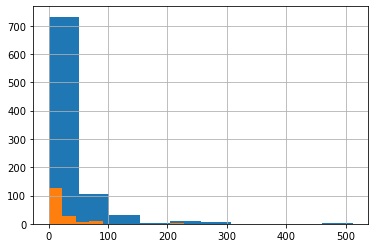

In [9]:
df.fare.hist(), no_age_info.fare.hist()

In [10]:
# Let's see how similar this group is to the population
for column in df.drop(columns=["age", "fare"]).columns:
    print(column)
    print("Population:")
    print(df[column].value_counts(normalize=True))
    print("No age")
    print(no_age_info[column].value_counts(normalize=True))
    print()
    print()

survived
Population:
0    0.616162
1    0.383838
Name: survived, dtype: float64
No age
0    0.706215
1    0.293785
Name: survived, dtype: float64


pclass
Population:
3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64
No age
3    0.768362
1    0.169492
2    0.062147
Name: pclass, dtype: float64


sex
Population:
male      0.647587
female    0.352413
Name: sex, dtype: float64
No age
male      0.700565
female    0.299435
Name: sex, dtype: float64


sibsp
Population:
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: sibsp, dtype: float64
No age
0    0.774011
1    0.146893
8    0.039548
3    0.022599
2    0.016949
Name: sibsp, dtype: float64


parch
Population:
0    0.760943
1    0.132435
2    0.089787
3    0.005612
5    0.005612
4    0.004489
6    0.001122
Name: parch, dtype: float64
No age
0    0.887006
2    0.067797
1    0.045198
Name: parch, dtype: float64


embark_town
Population:
Southampton    0.724409
Cherbou

In [11]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
passenger_id,,,,,,,,,
0,0,3,male,22.0,1,0,7.2500,Southampton,0
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,1
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1


In [12]:
# Looking at the distribution of values, it appears that no age subgroup is very close to the population
# If we needed to be more certain, we could perform hypothesis testing
# It looks like there's nothing wildly different about the no age group compared to the population
# So we'll impute using the median age
df.age = df.age.fillna(value=df.age.median())

In [13]:
# Time to encode the encodeable!
dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])

# Drop the original columns we encoded
df = df.drop(columns=["sex", "embark_town"])

# Stitch the df and the dummy_df together again
df = pd.concat([df, dummy_df], axis=1)
df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,,
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [14]:
df.head()

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,,
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


In [15]:
# Time to split!
train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

In [16]:
train.shape, validate.shape, test.shape

((498, 10), (214, 10), (179, 10))

In [17]:
X_train = train.drop(columns=["survived"])
y_train = train.survived

X_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

X_test = test.drop(columns=["survived"])
y_test = test.survived

In [18]:
X_train.shape, X_validate.shape, X_test.shape

((498, 9), (214, 9), (179, 9))

In [19]:
X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
passenger_id,,,,,,,,,
583,1,36.0,0,0,40.1250,1,1,0,0
165,3,9.0,0,2,20.5250,0,1,0,1
50,3,7.0,4,1,39.6875,0,1,0,1
259,2,50.0,0,1,26.0000,0,0,0,1
306,1,28.0,0,0,110.8833,1,0,0,0



- Does this model perform better than your baseline?</p>



In [20]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.62


In [23]:
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# import logistic_regression_util

In [24]:
# Define the logistic regression model
logit = LogisticRegression(C=1, random_state=123)

In [25]:
#  fit the model on train data
logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [26]:
# now use the model to make predictions
y_pred = logit.predict(X_train)

In [27]:
#take a look at predictions
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [28]:
logit.predict_proba(X_train)

array([[0.60085593, 0.39914407],
       [0.77901489, 0.22098511],
       [0.96484843, 0.03515157],
       [0.2077235 , 0.7922765 ],
       [0.07453754, 0.92546246],
       [0.75554607, 0.24445393],
       [0.8455829 , 0.1544171 ],
       [0.76697833, 0.23302167],
       [0.85595435, 0.14404565],
       [0.97868296, 0.02131704],
       [0.41979876, 0.58020124],
       [0.76457655, 0.23542345],
       [0.1592107 , 0.8407893 ],
       [0.66067704, 0.33932296],
       [0.81594889, 0.18405111],
       [0.95046206, 0.04953794],
       [0.91309681, 0.08690319],
       [0.28201675, 0.71798325],
       [0.80319758, 0.19680242],
       [0.33493918, 0.66506082],
       [0.30391108, 0.69608892],
       [0.91307459, 0.08692541],
       [0.04581443, 0.95418557],
       [0.04483562, 0.95516438],
       [0.65624763, 0.34375237],
       [0.89796211, 0.10203789],
       [0.1044393 , 0.8955607 ],
       [0.13902794, 0.86097206],
       [0.51095276, 0.48904724],
       [0.76105119, 0.23894881],
       [0.

In [29]:
logit.classes_

array([0, 1])

In [30]:
# View raw probabilities (output from the model)

y_pred_proba = logit.predict_proba(X_train)
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ['non-virginica', 'virginica'])
y_pred_proba.head()

,non-virginica,virginica
0,0.600856,0.399144
1,0.779015,0.220985
2,0.964848,0.035152
3,0.207724,0.792276
4,0.074538,0.925462


In [31]:
# classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       307
           1       0.79      0.71      0.75       191

    accuracy                           0.82       498
   macro avg       0.81      0.80      0.80       498
weighted avg       0.82      0.82      0.82       498



2. <p>Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this
   feature before including it in a model.</p>


3. <p>Try out other combinations of features and models.</p>



4. <p>Use you best 3 models to predict and evaluate on your validate sample.</p>


5. <p>Choose you best model from the validation performation, and evaluate it on the test dataset.  </p>




- How do the performance metrics compare to validate? 

- to train?


<p><strong>Bonus1</strong> How do different strategies for handling the missing values in
   the age column affect model performance?</p>


<p><strong>Bonus2</strong>: How do different strategies for encoding sex affect model
   performance?</p>


<p><strong>Bonus3</strong>: <code>scikit-learn</code>'s <code>LogisticRegression</code> classifier is actually
   applying <a href="https://en.wikipedia.org/wiki/Regularized_least_squares">a regularization penalty to the coefficients</a> by default.
   This penalty causes the magnitude of the coefficients in the resulting
   model to be smaller than they otherwise would be. This value can be
   modified with the <code>C</code> hyper parameter. Small values of <code>C</code> correspond to
   a larger penalty, and large values of <code>C</code> correspond to a smaller penalty.<br /><br />   
   Try out the following values for <code>C</code> and note how the coefficients and
   the model's performance on both the dataset it was trained on and on the
   validate split are affected..<br /><br />
    C = .01, .1, 1, 10, 100, 1000</p>


<p><strong>Bonus Bonus</strong>: how does scaling the data interact with your choice of <code>C</code>?</p>